<a href="https://colab.research.google.com/github/yna2131/SemanaTec/blob/main/actividad08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad - Regresión Lineal**

* **Nombre:** Yuna Chung
* **Matrícula:** A01709043

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.
**Importante:**

* Colocar nombres de ejes en gráficas.
* Títulos en las gráficas.
* Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [ ]:
# Carga las librerías necesarias.

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [ ]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'
  .format(name=fn, length=len(uploaded[fn])))

df = pd.read_csv('presion.csv')
df.head(6)

Saving presion.csv to presion.csv
User uploaded file "presion.csv" with length 772 bytes


,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:

* **Age:** Edad de la persona.
* **Average of ap_hi:** Promedio de presión alta.
* **Average of ap_lo:** Promedio de presión baja.

In [ ]:
x = df["Age"]
y1 = df["Average of ap_hi"]
y2 = df["Average of ap_lo"]

Text(0, 0.5, 'Presión')

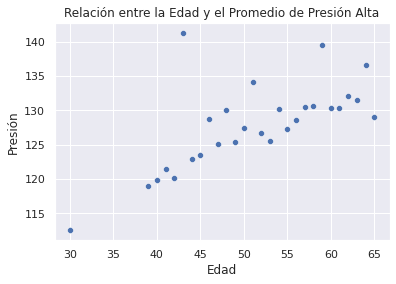

In [ ]:
# Grafica la información de la edad y presión alta

fig = plt.figure(figsize = (6, 4))
sns.scatterplot(data = df, x = "Age", y = "Average of ap_hi");

plt.title('Relación entre la Edad y el Promedio de Presión Alta')
plt.xlabel('Edad')
plt.ylabel('Presión')

Text(0, 0.5, 'Presión')

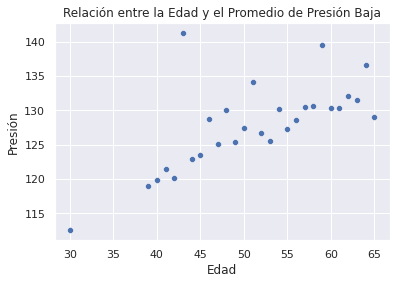

In [ ]:
# Grafica la información de la edad y presión baja

fig = plt.figure(figsize = (6, 4))
sns.scatterplot(data = df, x = "Age", y = "Average of ap_hi");

plt.title('Relación entre la Edad y el Promedio de Presión Baja')
plt.xlabel('Edad')
plt.ylabel('Presión')

Genera una regresión líneal para obtener una aproximación de la ecuación

$$y = ax + b$$

donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [ ]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?

from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True)
model1.fit(x[:, np.newaxis], y1)

print("Model slope: ", model1.coef_[0])
print("Model intercept: ", model1.intercept_)

Model slope:  0.47769702977669154
Model intercept:  103.3969740964366


<ipython-input-6-b4b6a858388e>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model1.fit(x[:, np.newaxis], y1)


Por lo tanto, $a$ = *0.47769702977669154* y $b$ = *103.3969740964366*

In [ ]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?

model2 = LinearRegression(fit_intercept = True)

model2.fit(x[:, np.newaxis], y2)

print("Model slope: ", model2.coef_[0])
print("Model intercept: ", model2.intercept_)

Model slope:  0.6089810580238237
Model intercept:  63.726200409422745


<ipython-input-7-f3d84046d0b7>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2.fit(x[:, np.newaxis], y2)


Por lo tanto, $a$ = *0.6089810580238237* y $b$ = *63.726200409422745*

Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde)

<ipython-input-10-067a30789ada>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  np.vstack([y1, model1.predict(x[:, np.newaxis])]), color = "green");


Text(0, 0.5, 'Presión')

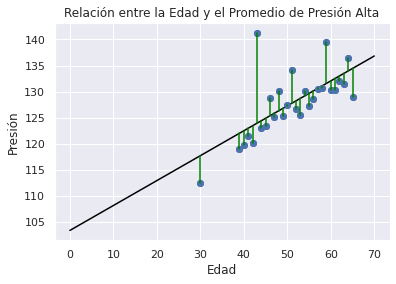

In [ ]:
# Presión alta

xfit = np.linspace(0, 70, 1000)
yfit = model1.predict(xfit[:, np.newaxis])

plt.scatter(x, y1)
plt.plot(xfit, yfit, color = "black");
plt.plot(x, y1, 'o')
plt.plot(np.vstack([x,x]), 
         np.vstack([y1, model1.predict(x[:, np.newaxis])]), color = "green");

plt.title('Relación entre la Edad y el Promedio de Presión Alta')
plt.xlabel('Edad')
plt.ylabel('Presión')

<ipython-input-12-7ea534fdb057>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([x, x]), np.vstack([y2, model2.predict(x[:, np.newaxis])]), color = "green");


Text(0, 0.5, 'Presión')

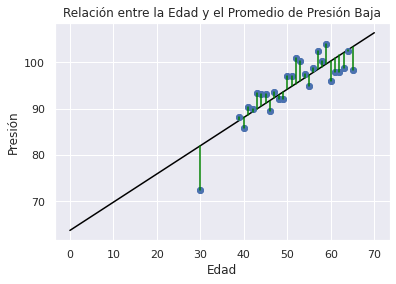

In [ ]:
# Presión baja

xfit = np.linspace(0, 70, 1000)
yfit = model2.predict(xfit[:, np.newaxis])

plt.scatter(x, y2)
plt.plot(xfit, yfit, color = "black");
plt.plot(x, y2, 'o')
plt.plot(np.vstack([x, x]), np.vstack([y2, model2.predict(x[:, np.newaxis])]), color = "green");

plt.title('Relación entre la Edad y el Promedio de Presión Baja')
plt.xlabel('Edad')
plt.ylabel('Presión')

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [ ]:
def pressure_low(age):
  low = (model2.coef_[0]*age) + (model2.intercept_)
  return low

query_age = 76
pressure_low(query_age)

110.00876081923334

In [ ]:
def pressure_high(age):
  high = (model1.coef_[0]*age) + (model1.intercept_)
  return high

query_age = 76
pressure_high(query_age)

139.70194835946515